<a href="https://colab.research.google.com/github/Mafecedeno12/Taller-Final-Finanzas-Computacionales/blob/main/Trabajo_final_finanzas_commpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNIVERSIDAD EXTERNADO DE COLOMBIA**
 
 **FINANZAS COMPUTACIONALES**


**PROYECTO FINAL- CASO DE APLICACIÓN**


**ANA MARÍA ACOSTA PÉREZ**


**MELANIE MARÍA CANDIL ESCOBAR**


**MARIA FERNANDA CEDEÑO BARRIOS**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import linprog
import seaborn as sns

Con el objetivo de optimizar el valor de la cosecha para el café y el cacao en Colombia, se tendrán en cuenta la producción de los mismos, así como el area de cultivo. Para ello se sustrajeron datos de las asociaciones de cafeteros y del sector cacao.

In [ ]:
# Data 
#Valor de la cosecha queda en miles de millones

df0 = pd.read_excel('/content/Optimización de producción Agro.xlsx').dropna()
df0['Valor de la cosecha']=df0['Valor de la cosecha']/1000000000
df= df0.transpose()
df

,0,1
Commoditie,Café,Cacao
Valor de la cosecha,10768.530454,9.404399
Producción,12577000.0,1150666.666667
Area cultivo (ha),840111.82,188000.0


In [ ]:
Mu = df0.mean()
st = df0.std()
Mu,st

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


(Valor de la cosecha    5.388967e+03
 Producción             6.863833e+06
 Area cultivo (ha)      5.140559e+05
 dtype: float64, Valor de la cosecha    7.607851e+03
 Producción             8.079638e+06
 Area cultivo (ha)      4.611127e+05
 dtype: float64)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


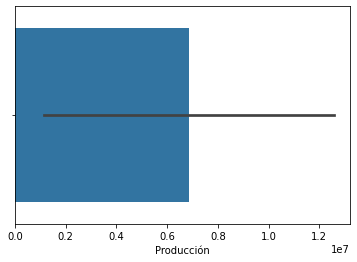

In [ ]:
sns.barplot(df0['Producción'])

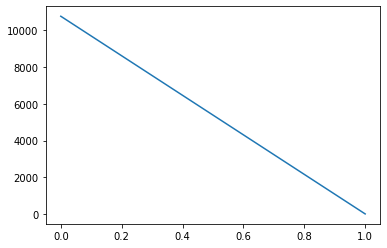

In [ ]:
plt.plot(df0['Valor de la cosecha'])

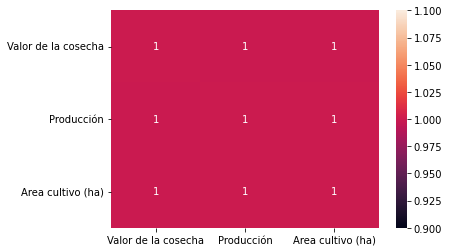

In [ ]:
corr=df0.corr()
sns.heatmap(data=corr,annot=True)

In [ ]:
Vc = df[1:2]
Vc=Vc*(1+0.1222)
Vc

,0,1
Valor de la cosecha,12084.444876,10.553616


In [ ]:
# Parametros de la función objetivo
c1 = np.array([12084.444876, 	10.553616])


# Restricciones de desigualdad
A1 = np.array([[12577000.0, 1150666.666667],
               [840111.82,	188000.0]])

b1 = np.array([10768.530454, 9.404399])


In [ ]:
A1

array([[[12577000.0, 1150666.6666666667],
        [840111.82, 188000.0]]], dtype=object)

In [ ]:
sol1 = linprog(-c1, A_ub=A1, b_ub=b1, method='revised simplex')
sol1

     con: array([], dtype=float64)
     fun: -0.1352759699386321
 message: 'Optimization terminated successfully.'
     nit: 1
   slack: array([10627.7407122,     0.       ])
  status: 0
 success: True
       x: array([1.11942229e-05, 0.00000000e+00])

Dada la naturaleza de los datos se realiza una obtimización vía lingpro, que muestra una mayor valoración para el café, si los esfuerzos en el cultivo de cacao se centran en la producción de café, pues de esta forma se lograría mejor producción dada el área de cultivo.

#Monte Carlo


In [ ]:
df2=pd.read_excel('/content/Optimización de producción Agro.xlsx').dropna()
df2['Valor de la cosecha']=df2['Valor de la cosecha']/1000000000
mu = df2.mean()
mu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Valor de la cosecha    5.388967e+03
Producción             6.863833e+06
Area cultivo (ha)      5.140559e+05
dtype: float64

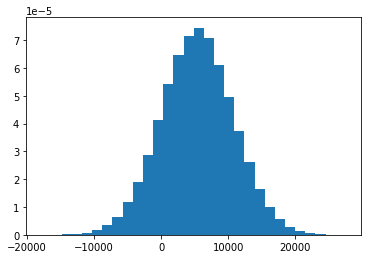

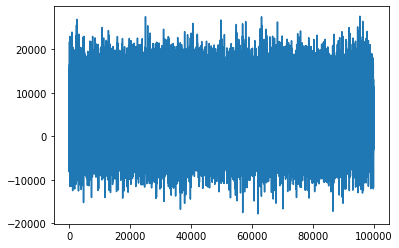

In [ ]:
df2=pd.read_excel('/content/Optimización de producción Agro.xlsx').dropna()
df2['Valor de la cosecha']=df2['Valor de la cosecha']/1000000000
mu = df2['Valor de la cosecha'].mean()
sd = np.std(df2['Valor de la cosecha'])
simulations = 100000
ma = np.random.normal(mu, sd, simulations)
plt.hist(ma,density=True,bins=30)
plt.show()
plt.plot(ma)
plt.show()


Dado que se trata de dos productos y, que la correlaciónde variables es alta, se entiende que se trata de una distribución cercana a la normal, por lo que en la simulación montecarlo la valoración óptima se encuentra al rededor de los 5 billones de pesos.